The notebook contains an example of feature engineering for music information retrieval project. The data set used is GTZAN, a music data set created for genre classification tasks. The code is fully explained in my article on feature engineering for audio data at [MIR: feature engineering](https://medium.com/@kate.ruksha/music-information-retrieval-feature-engineering-05748d26df48). 

In case you need an introduction to music data processing, checkout this Medium article - [MIR: introduction](https://medium.com/@kate.ruksha/introduction-into-music-information-retrieval-part-1-2dc874cda763).

In [ ]:
import scipy, numpy as np
import librosa

from scipy.io.wavfile import write, read
import IPython

# Get data

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import librosa

In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

100% 1.21G/1.21G [00:14<00:00, 66.0MB/s]
100% 1.21G/1.21G [00:14<00:00, 90.8MB/s]


In [4]:
! unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [5]:
# Make a list of all the wav files in the dataset and store them in a variable
from glob import glob
audio_files = glob("Data/genres_original/*/*.wav")
print(len(audio_files))

1000


## Feature visualization
Analysis is based on this [post](https://www.kaggle.com/code/nippani/preprocessing-audio-data-gtzan).


In [6]:
path = ""

path_audio_files = path + "Data/genres_original/"
HOP_SIZE = 512
FRAME_SIZE = 1024

N_FFT = 2048

genre_dict = {"blues":0,
              "classical":1,
              "country":2,
              "disco":3,
              "hiphop":4,
              "jazz":5,
              "metal":6,
              "pop":7,
              "reggae":8,
              "rock":9}

## High-level features

In [ ]:
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    y, sr = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
    print(genre, " - ", tempo[0])

classical  -  95.703125
hiphop  -  117.45383522727273
jazz  -  123.046875
rock  -  123.046875


In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("Data/features_30_sec.csv")[["label", "tempo"]]

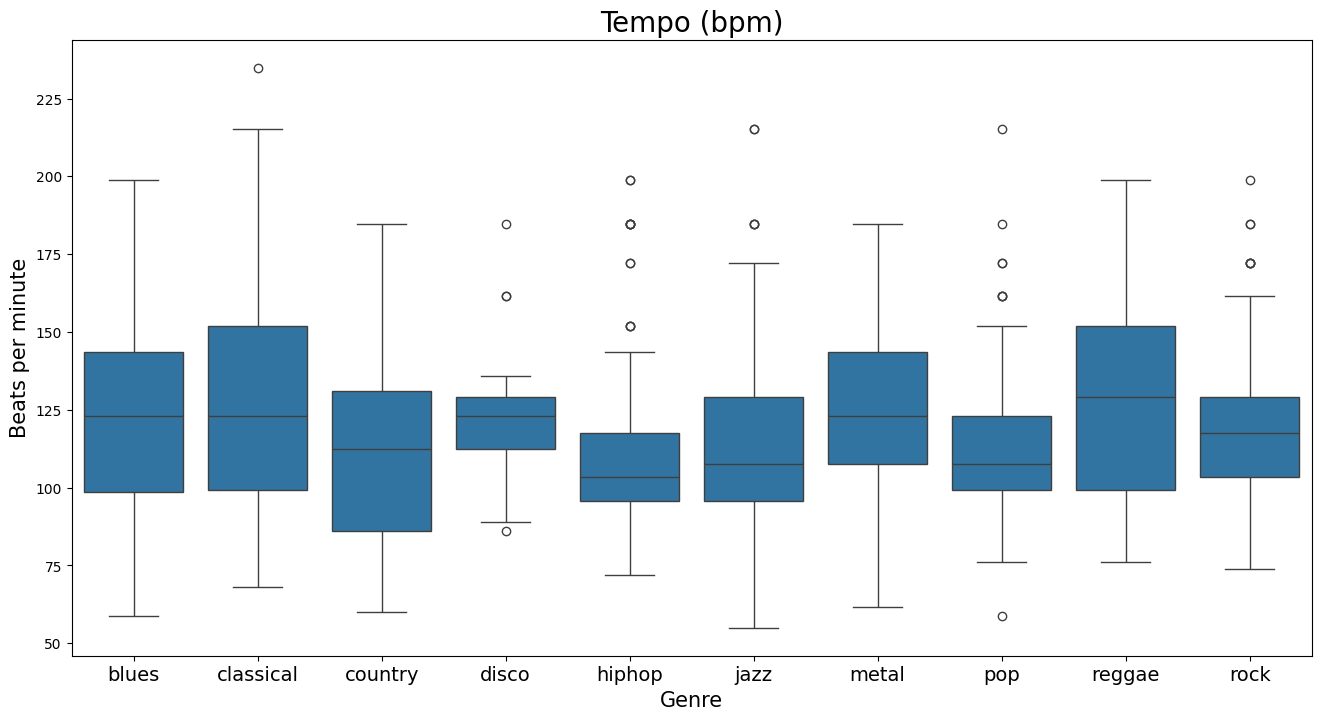

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = df)

plt.title('Tempo (bpm)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Beats per minute", fontsize = 15)
plt.savefig("11_tempo.png")

## Time domain features

### Waveform

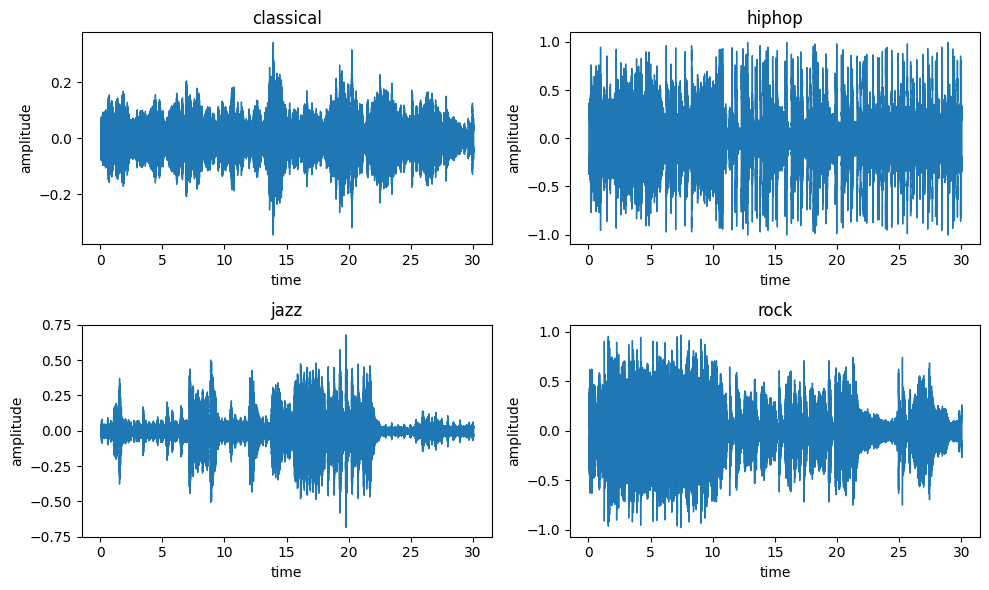

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    librosa.display.waveshow(y = data, sr = sampling_rate, ax=axes[i][j])
    axes[i][j].set_title(genre)
    axes[i][j].set_xlabel("time")
    axes[i][j].set_ylabel("amplitude")
    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("0_waveforms.png")
plt.show()

### Amplitude Envelope and RMSE

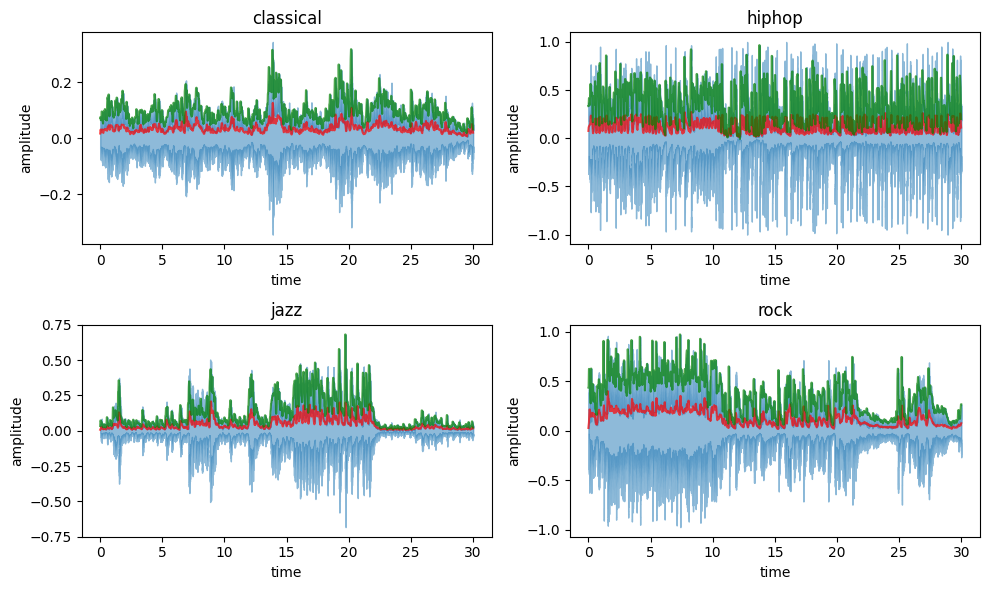

In [27]:

def amplitude_envelope(signal, frame_size, hop_length):
    """Function for calculating the amplitude envelope"""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, HOP_SIZE)])

fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:

    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")

    ae = amplitude_envelope(signal=data, hop_length=HOP_SIZE, frame_size=FRAME_SIZE)
    rms = librosa.feature.rms(y=data, frame_length=FRAME_SIZE, hop_length=HOP_SIZE)[0][:len(ae)]

    frames = range(len(rms))
    t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

    librosa.display.waveshow(y = data, sr = sampling_rate, alpha=0.5, ax = axes[i][j])
    axes[i][j].plot(t, rms, color="r", alpha=0.7)
    axes[i][j].plot(t, ae, color="g", alpha=0.7)
    axes[i][j].set_title(genre)
    axes[i][j].set_ylabel("amplitude")
    axes[i][j].set_xlabel("time")

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("1_ae_rmse.png")
plt.show()

### Zero crossing rate

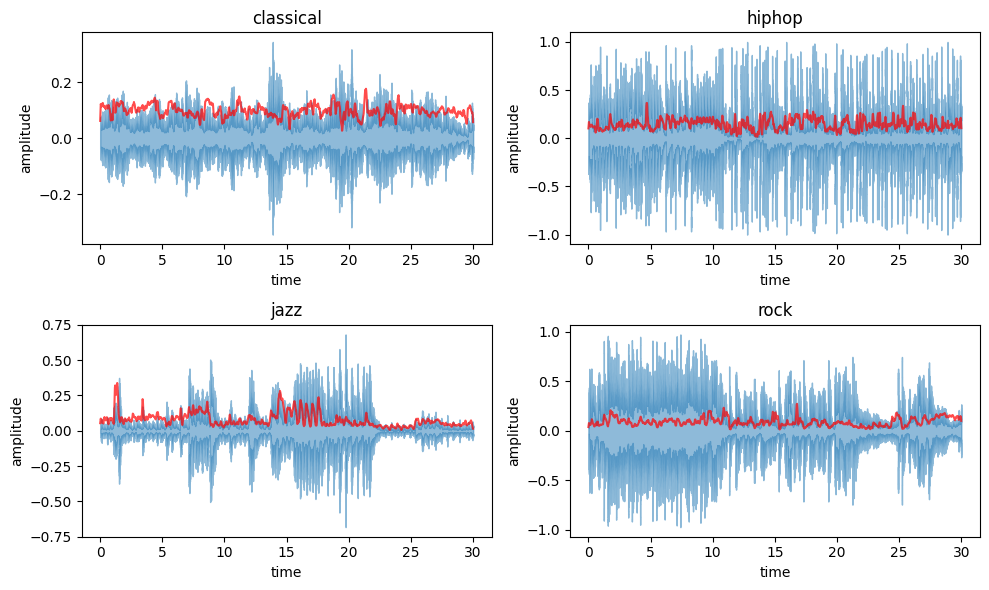

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:

    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data,hop_length = HOP_SIZE)[0]

    frames = range(len(rms))
    t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

    librosa.display.waveshow(y = data, sr = sampling_rate, alpha=0.5, ax = axes[i][j])
    axes[i][j].plot(t, zero_crossing_rate, color="r", alpha=0.7)
    axes[i][j].set_title(genre)
    axes[i][j].set_ylabel("amplitude")
    axes[i][j].set_xlabel("time")

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("2_zero_crossing_rate.png")
plt.show()

Can extract the statistical features like mean, stddev

## Frequency domain features

### Spectrum (STFT)
 (Short Time Fourier Transforms)


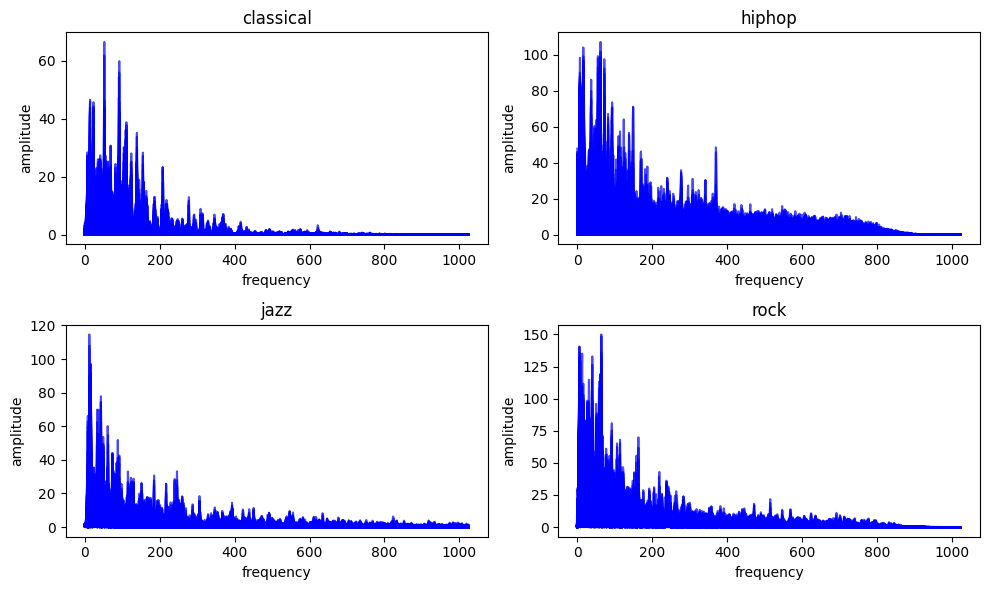

In [ ]:

fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:

    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    stft_data = np.abs(librosa.stft(y = data, n_fft = N_FFT, hop_length = HOP_SIZE))
    axes[i][j].plot(stft_data,color = "b", alpha=0.7)
    axes[i][j].set_title(genre)
    axes[i][j].set_xlabel("frequency")
    axes[i][j].set_ylabel("amplitude")

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("3_spectrum_plots.png")
plt.show()

### Spectral Centroid and Bandwidth

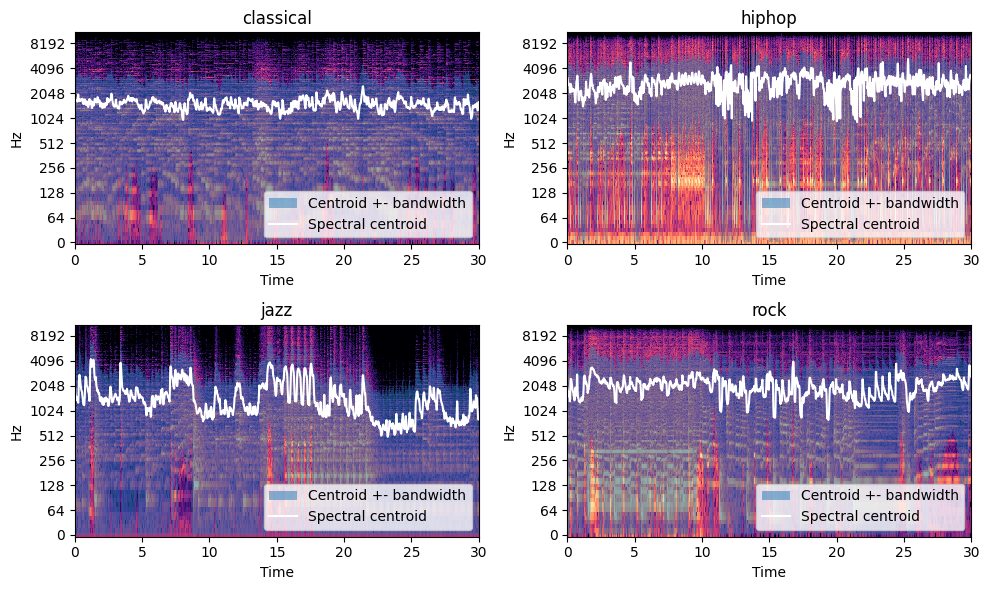

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    spec_bw = librosa.feature.spectral_bandwidth(y=data, sr=sampling_rate)
    S, phase = librosa.magphase(librosa.stft(y=data))
    times = librosa.times_like(spec_bw)
    centroid = librosa.feature.spectral_centroid(S=S)
    frames = range(len(centroid))
    t = librosa.frames_to_time(frames)

    img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=axes[i][j])
    axes[i][j].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
    axes[i][j].plot(times, centroid[0], label='Spectral centroid', color='w')
    axes[i][j].legend(loc='lower right')
    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("4_spectral_centroid.png")
plt.show()

### Spectral Roll-Off

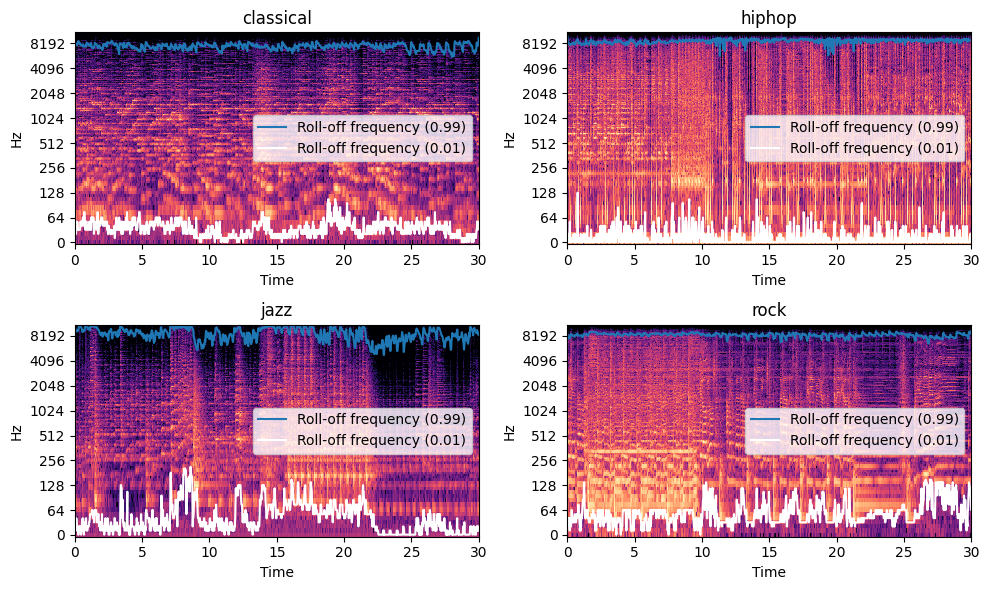

In [11]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    S, phase = librosa.magphase(librosa.stft(y=data))
    rolloff = librosa.feature.spectral_rolloff(y=data, sr=sampling_rate, roll_percent=0.99)
    rolloff_min = librosa.feature.spectral_rolloff(y=data, sr=sampling_rate, roll_percent=0.01)

    img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=axes[i][j])
    axes[i][j].plot(librosa.times_like(rolloff), rolloff[0],
                    label='Roll-off frequency (0.99)')
    axes[i][j].plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
    axes[i][j].set_title(genre)
    axes[i][j].legend(loc='center right')

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("5_spectral_rolloff.png")
plt.show()

### Harmonic vs Percussive

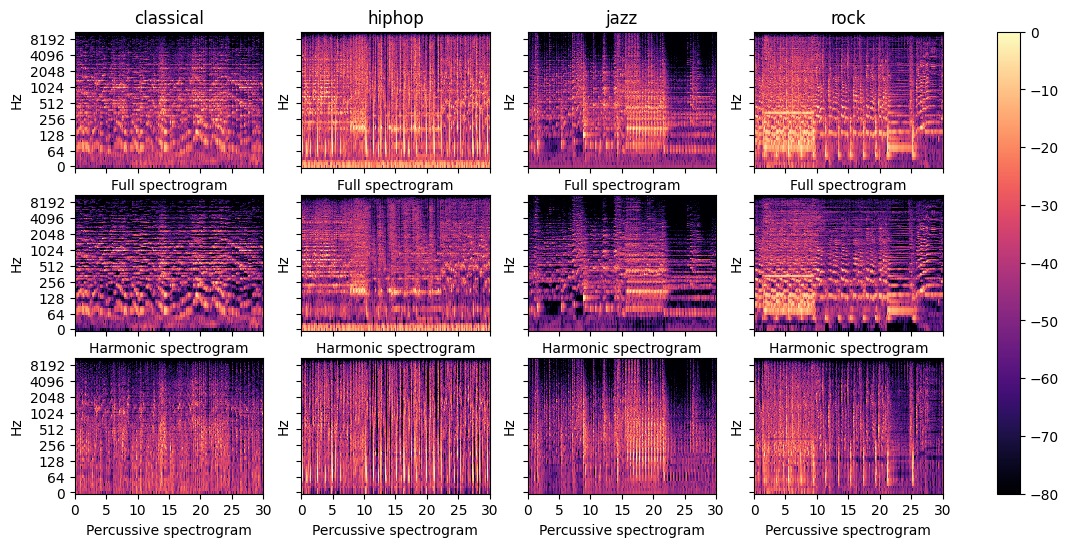

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(14, 6))

i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    y,sr = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    D = librosa.stft(y)
    D_harmonic, D_percussive = librosa.decompose.hpss(D)
    # Pre-compute a global reference power from the input spectrum
    rp = np.max(np.abs(D))

    img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0,j])
    ax[0,j].set(title=genre)
    ax[0,j].set_xlabel("Full spectrogram")
    # ax[0,j].label_outer()

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1,j])
    ax[1,j].set_xlabel('Harmonic spectrogram')
    # ax[1,j].label_outer()

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2,j])
    ax[2,j].set_xlabel('Percussive spectrogram')
    j += 1


fig.colorbar(img, ax=ax)
plt.savefig("12_harmonic_percussive.png")

## Mid level features

### Mel Spectrogram

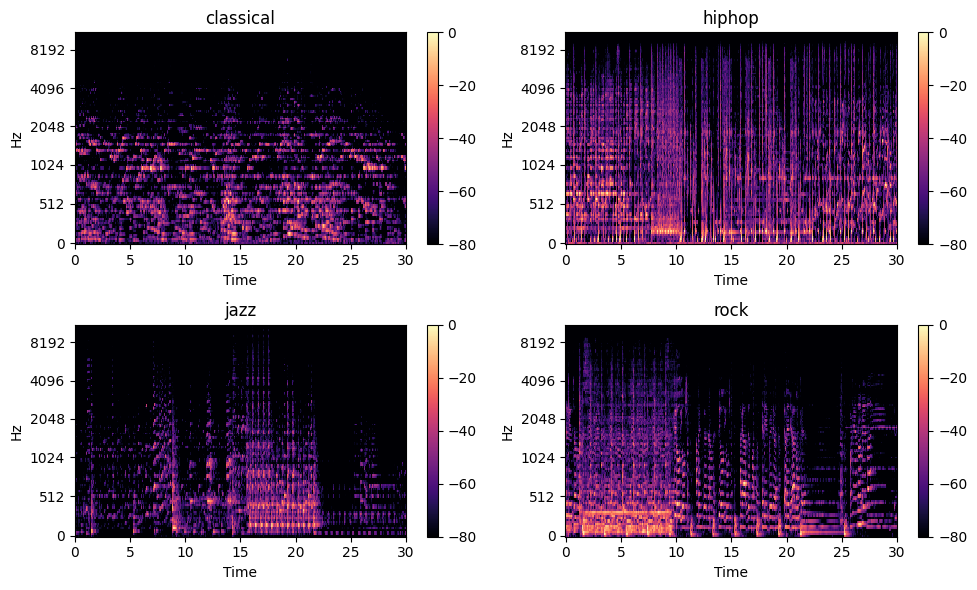

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")

    mel_spec = librosa.feature.melspectrogram(y=data, sr=sampling_rate,hop_length = HOP_SIZE)

    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    img = librosa.display.specshow(mel_spec_db, sr = sampling_rate, hop_length = HOP_SIZE, x_axis = 'time', y_axis = 'mel',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])

    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("6_melspectrograms.png")
plt.show()

### Mel Frequency Cepstral Coefficients

<ipython-input-37-40c2a5f34925>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_yticklabels([str(i) for i in range(1,13)])


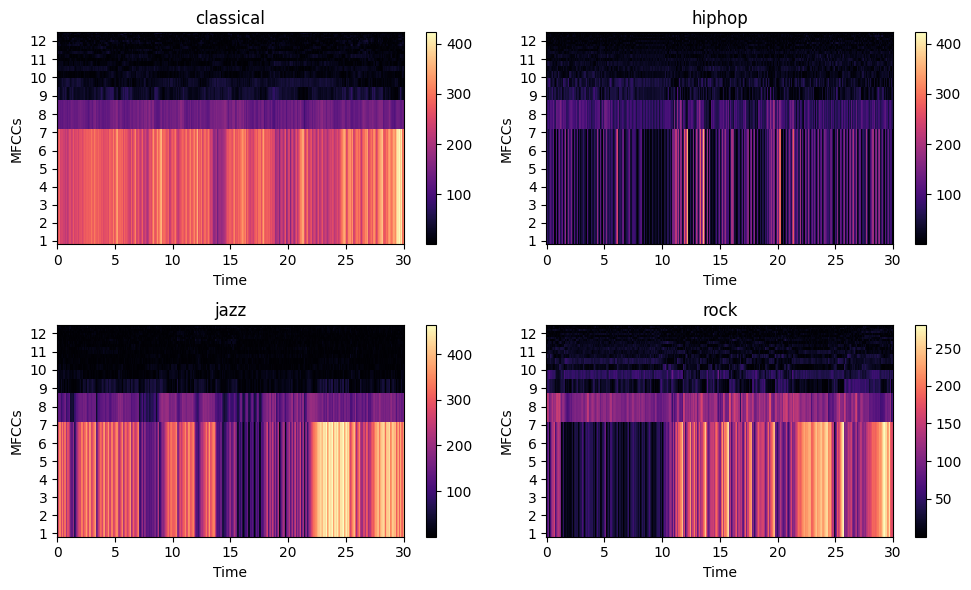

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    mfcc_data = np.abs(librosa.feature.mfcc(y=data, sr = sampling_rate))
    img = librosa.display.specshow(mfcc_data, sr = sampling_rate, x_axis = 'time', y_axis = 'log',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])

    axes[i][j].set_title(genre)
    axes[i][j].set_yticklabels([str(i) for i in range(1,13)])
    axes[i][j].set_ylabel("MFCCs")

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("7_mfcc.png")
plt.show()

### Chromagram

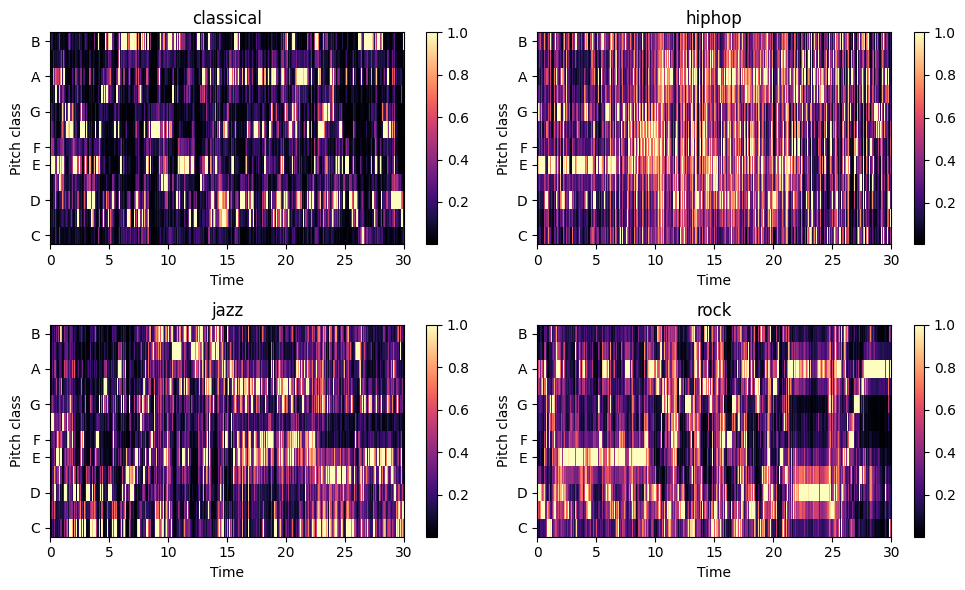

In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
i, j = 0, 0
for genre in ['classical', 'hiphop', 'jazz', 'rock']:
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    chromagram = librosa.feature.chroma_stft(y=data, sr=sampling_rate, hop_length=HOP_SIZE)
    img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=HOP_SIZE, ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])

    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.savefig("10_chromagrams.png")
plt.show()


# Modeling

In [35]:
def feature_generation(path = "Data/genres_original/"):
    import re
    from glob import glob

    audio_files = glob(path + "*/*.wav")

    N_MFCC = 20
    HOP_SIZE = 512
    FRAME_SIZE = 1024
    N_FFT = 2048

    dataset = pd.DataFrame()

    for i in range(len(audio_files)):

        try:
            y, sampling_rate = librosa.load(audio_files[i])
        except:
            print("Error while reading ", audio_files[i])
            pass
        dataset.loc[i, 'filename'] = audio_files[i]
        dataset.loc[i, 'label'] = re.sub(r'\/.*', "", audio_files[i].replace(path, ""))
        dataset.loc[i, 'length'] = int(y.shape[0])

        # Tempo
        onset_env = librosa.onset.onset_strength(y=y, sr=sampling_rate)
        tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sampling_rate)
        dataset.loc[i, "tempo"] = tempo

        # Amplitude envelope
        ae = amplitude_envelope(signal=y, hop_length=HOP_SIZE, frame_size=FRAME_SIZE)

        # Root mean square energy
        rms = librosa.feature.rms(y=y, frame_length=FRAME_SIZE, hop_length=HOP_SIZE)[0]
        dataset.loc[i, "rms_mean"] = rms.mean()
        dataset.loc[i, "rms_var"] = rms.var()

        # Zero crossing rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y = y,hop_length = HOP_SIZE)[0]
        dataset.loc[i, "zero_crossing_rate_mean"] = zero_crossing_rate.mean()
        dataset.loc[i, "zero_crossing_rate_var"] = zero_crossing_rate.var()

        # Spectral centroid
        centroid = librosa.feature.spectral_centroid(y=y)
        dataset.loc[i, "spectral_centroid_mean"] = centroid.mean()
        dataset.loc[i, "spectral_centroid_var"] = centroid.var()

        # Spectral bandwidth
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sampling_rate)
        dataset.loc[i, "spectral_bandwidth_mean"] = spec_bw.mean()
        dataset.loc[i, "spectral_bandwidth_var"] = spec_bw.var()

        # Spectral roll-off
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sampling_rate)
        dataset.loc[i, "rolloff_mean"] = rolloff.mean()
        dataset.loc[i, "rolloff_var"] = rolloff.var()

        # Harmonic and percussive
        D = librosa.stft(y)
        D_harmonic, D_percussive = librosa.decompose.hpss(D)
        dataset.loc[i, "harmony_mean"] = D_harmonic.mean()
        dataset.loc[i, "harmony_var"] = D_harmonic.var()
        dataset.loc[i, "perceptr_mean"] = D_percussive.mean()
        dataset.loc[i, "perceptr_var"] = D_percussive.var()

        # Chromagram
        chromagram = librosa.feature.chroma_stft(y=y, sr=sampling_rate, hop_length=HOP_SIZE)
        dataset.loc[i, "chroma_stft_mean"] = chromagram.mean()
        dataset.loc[i, "chroma_stft_var"] = chromagram.var()

        # MFCCs
        mfcc_data = librosa.feature.mfcc(y=y, sr = sampling_rate, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_SIZE)
        mfcc_data=mfcc_data.T
        for x in range(N_MFCC):
            dataset.loc[i, "mfcc" + str(x+1) + "_mean"] = (mfcc_data[:,x].mean())
            dataset.loc[i, "mfcc" + str(x+1) + "_var"] = (mfcc_data[:,x].var())

    return dataset

In [36]:
dataset = feature_generation()

In [53]:
dataset.head()

filename    length       tempo  rms_mean  \
0  Data/genres_original/jazz/jazz.00006.wav  661794.0  135.999178  0.097759   
1  Data/genres_original/jazz/jazz.00057.wav  661794.0   95.703125  0.077571   
2  Data/genres_original/jazz/jazz.00067.wav  661794.0  103.359375  0.137500   
3  Data/genres_original/jazz/jazz.00046.wav  661794.0  107.666016  0.107600   
4  Data/genres_original/jazz/jazz.00076.wav  661794.0  117.453835  0.117796   

    rms_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  0.001520                 0.048040                0.000695   
1  0.002368                 0.061859                0.001325   
2  0.001447                 0.054932                0.000619   
3  0.004121                 0.058636                0.000418   
4  0.003327                 0.068700                0.000767   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1219.512486          265242.657080              1458.875396   
1             1378.675372          168283.038665              1773.759961   
2             1353.994037          197201.833334              1567.021309   
3             1295.239347           82100.224220              1446.153690   
4             1733.735681          147170.278404              2068.216050   

   ...  mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0  ...   56.463604    -4.477752   59.224556    -5.545833  105.164917   
1  ...   49.089474    -1.511531   72.866600    -3.522223   94.406006   
2  ...   51.652172    -2.225063   61.113895    -1.955293  109.895302   
3  ...  116.237411     1.516979   63.175549    -1.050152   67.482224   
4  ...   42.580338    -3.936800   30.051359    -1.469241   47.136574   

   mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  genre  
0    -1.171263  149.539734    -1.099528  132.902847   jazz  
1    -6.183240  113.695427    -7.337620   90.912453   jazz  
2    -0.030367  153.161682     0.756865  172.705078   jazz  
3    -1.772142   73.549255    -2.475663   72.650330   jazz  
4    -4.413507   44.562515   -10.597857   46.885162   jazz  

[5 rows x 60 columns]

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

y = df['label']
X = np.array(df.drop(['filename', 'label'], axis=1), dtype = float)

# split data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 58), (330, 58), (670,), (330,))

In [79]:
encoder = LabelEncoder().fit(y_train)
scaler = StandardScaler().fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [80]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [88]:
model = lgb.LGBMClassifier(objective='multiclass',
                             verbose=-1,
                            random_state=101,
                           verbose_eval=False)
model.fit(X_train, y_train)

LGBMClassifier(objective='multiclass', random_state=101, verbose=-1,
               verbose_eval=False)

In [89]:
y_pred = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.7787878787878788
